In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [2]:
import os
from datetime import date    
today = date.today()
## Get output folder
dr = str(today.year)+str(today.month).zfill(2)
os.chdir('/Users/sara.runkel/Documents/13000Cities/')
output_dir = '/Users/sara.runkel/Documents/13000Cities/Outputs/' + dr +'/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('Made monthly output directory')
if not os.path.exists(output_dir+today.isoformat()):
    os.makedirs(output_dir+today.isoformat())
    print('Made daily output directory')
output_dir = '/Users/sara.runkel/Documents/13000Cities/Outputs/' + dr +'/' + today.isoformat() +'/'

In [4]:
df=pd.read_csv('Inputs/us_asthmaprediction.csv')

In [5]:
st='HI'
hi =df.query('State==@st').copy()
st='AK'
ak =df.query('State==@st').copy()
t1= np.arange(0,1.03,step=0.1)
cmap1=mpl.cm.get_cmap('RdYlGn_r',10)
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap1.set_extremes(under='#160084', over='#9A1D1D')

/var/folders/zc/2k6k2snx5pg27jkblzj0tmy40000gq/T/ipykernel_38646/783824866.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1=mpl.cm.get_cmap('RdYlGn_r',10)


In [6]:
##plotting constants
# Hawaii has 8 main islands but several tiny atolls that extend for many miles.
# This is the area cutoff between the 8 main islands and the tiny atolls.
AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

##Plot color settings
light_gray = [0.8]*3  # define light gray color RGB
mpl.rc('axes',edgecolor=light_gray)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


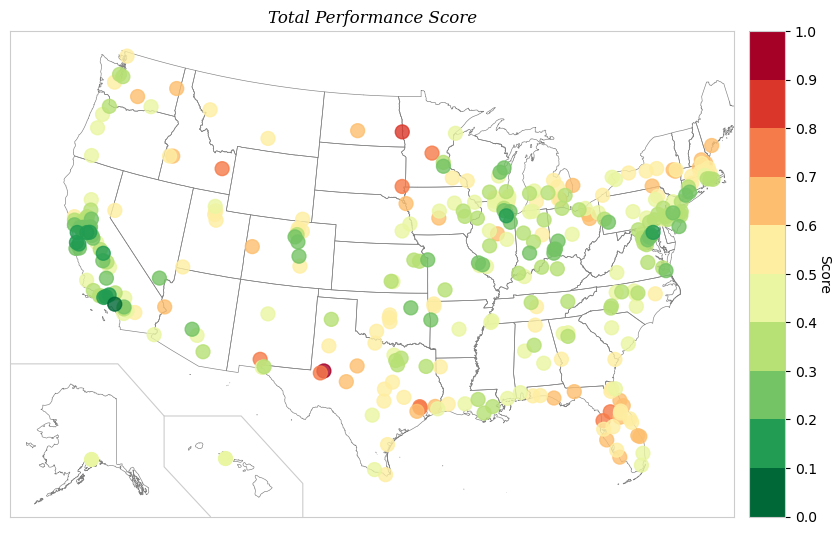

In [7]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(111)
ax.set_facecolor('white')
m = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

#Basemap for HI and AK plots
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)

shp_info = m.readshapefile('cb_2018_us_state_5m/st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('cb_2018_us_state_5m/st99_d00','states',drawbounds=False)
for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = 'white'
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = 'white'
        poly = Polygon(seg, facecolor=color,edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Total Performance Score',fontfamily='serif', fontstyle='italic')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

xpt,ypt = m(df['Longitude'],df.Latitude)
m.scatter(xpt,ypt,c=df.Total_Score,s = 100,alpha = 0.8,cmap=cmap1,zorder=50,vmin=0,vmax=1)
xpt,ypt = m_(hi['Longitude'].iloc[0],hi.Latitude.iloc[0])
m_.scatter(xpt+ HI_OFFSET_X,ypt+ HI_OFFSET_Y,c=hi.iloc[0]['Total_Score'],cmap=cmap1,s = 100,vmin=0,vmax=1,zorder=50)
xpt,ypt = m_(ak['Longitude'].iloc[0],ak.Latitude.iloc[0])
m_.scatter(xpt*AK_SCALE+ AK_OFFSET_X,ypt*AK_SCALE+ AK_OFFSET_Y,cmap=cmap1,c=ak.iloc[0]['Total_Score'],s = 100,vmin=0,vmax=1,zorder=50)
cbar=m.colorbar(cmap=cmap1,
                                #norm=norm,
                                #boundaries= b1,
                                ticks=t1,
                                spacing='proportional',
                                )
cbar.set_label('Score', rotation=270,labelpad=10)
plt.savefig(output_dir+'PerformanceScore_map.eps')

In [8]:
title1= '# of Cases in 2019'
v1='Actual_Cases'
title2 = '# of Residual Cases'
title3='Residual Case Rate per 100K People'
v2='Cases_Residual'
v3='Rates_Residual'

In [9]:
import matplotlib as mpl
#colours = ['#009197','#90bbb7','#c4cbc9', '#dccc71','#c69228'] ' '#d3b360', '#cfa84a', '#cb9d38', 
alt = ['#005e64', '#0d777a', '#29908f', '#4ca9a5', '#7bc0ba', '#cdcdcd', '#e8d79c', '#dfc67a', '#d7b55c', '#cea442', '#c69228']
colours= ['#005e64', '#0c7679', '#288e8e', '#4ba6a3', '#7abcb8', '#c9c9c9', '#d5be7c','#c69228']
b1=np.arange(-.66,0.24,step=0.13)
b3= np.arange(7,18,1.3)
b2=np.arange(-40,16,8)

t1= np.arange(-.6,0.30,step=0.12)
t3= np.arange(7,18,1)
t2=np.arange(-40,16,8)


In [11]:
#Set cmap for set of 3 submplots
cmap=mpl.cm.get_cmap('Spectral_r',10)
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist.insert(5,'#CBCBC0')
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N+1)
cmaplist.pop(6)
cmaplist.pop(4)
cm = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, 9)
norm = mpl.colors.BoundaryNorm(boundaries=b1, ncolors=cmap.N)
norm=mpl.colors.CenteredNorm()
cmap.set_extremes(under='#160084', over='#650303')


/var/folders/zc/2k6k2snx5pg27jkblzj0tmy40000gq/T/ipykernel_38646/1633000263.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=mpl.cm.get_cmap('Spectral_r',10)


In [12]:
def plot_map(ds,subpl,norm,cmap,var,ticks,extend):
    ax = fig.add_subplot(subpl)
    m = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
    m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
                projection='merc',lat_ts=20)

    shp_info = m.readshapefile('cb_2018_us_state_5m/st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
    shp_info_ = m_.readshapefile('cb_2018_us_state_5m/st99_d00','states',drawbounds=False)
    for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
        if shapedict['NAME'] in ['Alaska', 'Hawaii']:
            seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
            if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
                seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
                color = 'white'
            elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
                seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                    for x, y in seg]
                color = 'white'
            poly = Polygon(seg, facecolor=color,edgecolor='gray', linewidth=.45)
            ax.add_patch(poly)
    #%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------

    m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
    m_.plot(x2,y2,color=light_gray,linewidth=0.8)
    xpt,ypt = m(ds['Longitude'],ds.Latitude)
    m.scatter(xpt,ypt,c=ds[var],cmap=cmap,zorder=50,norm=norm)
    xpt,ypt = m_(hi['Longitude'].iloc[0],hi.Latitude.iloc[0])
    m_.scatter(xpt+ HI_OFFSET_X,ypt+ HI_OFFSET_Y,cmap=cmap,c=hi.iloc[0][var],norm=norm,zorder=50)
    xpt,ypt = m_(ak['Longitude'].iloc[0],ak.Latitude.iloc[0])
    cbar=m.colorbar(cmap=cmap, pad= 0.4,
                                    norm=norm,
                                extend=extend,
                                ticks=ticks,
                                spacing='proportional')
    m_.scatter(xpt*AK_SCALE+ AK_OFFSET_X,ypt*AK_SCALE+ AK_OFFSET_Y,cmap=cmap,c=ak.iloc[0][var],norm=norm,zorder=50)
    return ax, cbar

In [13]:
cmap2=mpl.cm.get_cmap('plasma_r',11)
cmap2.set_extremes(over='0.1')

/var/folders/zc/2k6k2snx5pg27jkblzj0tmy40000gq/T/ipykernel_38646/941245895.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2=mpl.cm.get_cmap('plasma_r',11)


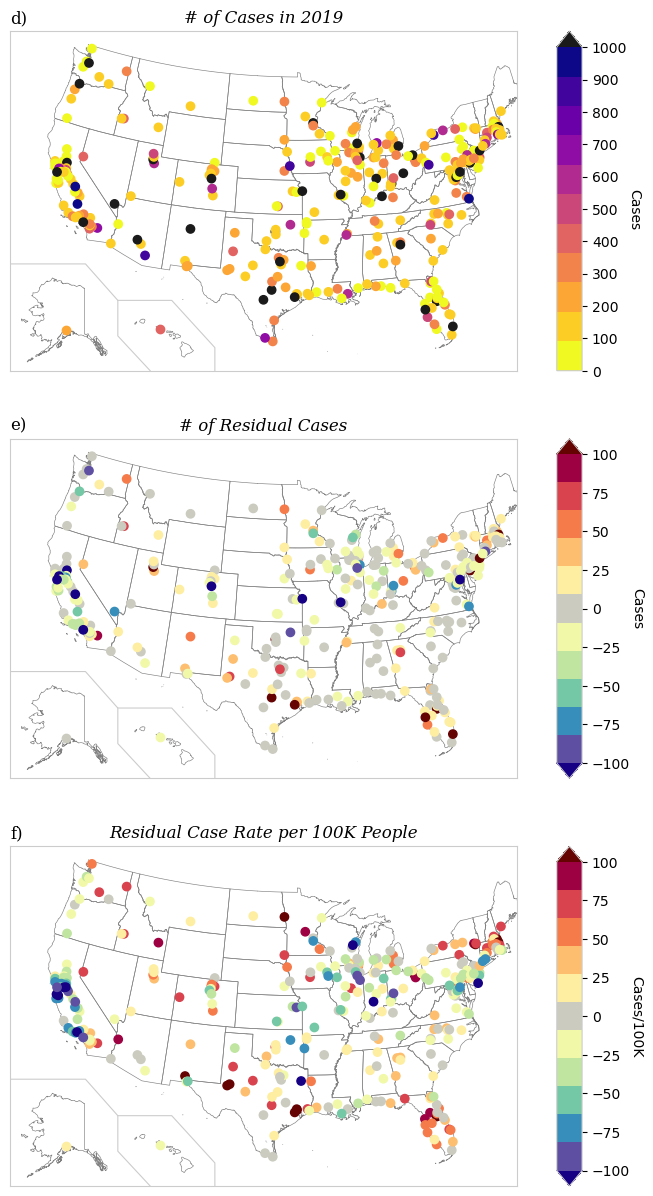

In [15]:
fig = plt.figure(figsize=(10,15))
norm = mpl.colors.Normalize(vmin=-100, vmax=100)
t=np.arange(-100,101,25)
ax,cbar = plot_map(df,313,norm,cmap, 'Rates_Residual',t,'both')
cbar.set_label('Cases/100K', rotation=270,labelpad=10)
ax.set_title(title3,fontfamily='serif', fontstyle='italic')
ax.set_title('f)',loc='left',fontfamily='serif' )

ax,cbar = plot_map(df,312,norm,cmap, 'Cases_Residual',t,'both')
ax.set_title(title2,fontfamily='serif', fontstyle='italic')
ax.set_title('e)',loc='left',fontfamily='serif' )
cbar.set_label('Cases', rotation=270,labelpad=10)

norm = mpl.colors.Normalize(vmin=0, vmax=1000)
t=np.arange(0,1001,100)
ax,cbar = plot_map(df,311,norm,cmap2, 'Actual_Cases',t,'max')
ax.set_title(title1,fontfamily='serif', fontstyle='italic')
ax.set_title('d)',loc='left',fontfamily='serif' )
cbar.set_label('Cases', rotation=270,labelpad=10)
plt.savefig(output_dir+'Cases_Subplots.eps')

In [16]:
##Fine tuning colors and and ticks for Pltoing

cmlist =[(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0),
 (0.21873638344226584, 0.5586056644880175, 0.730718954248366, 1.0),
 (0.4601307189542485, 0.7843137254901961, 0.6461873638344227, 1.0),
 (0.7477124183006537, 0.8980392156862746, 0.6274509803921569, 1.0),
 '#CBCBC0',
 (0.9647058823529413, 0.48409586056644904, 0.28888888888888903, 1.0),
 (0.8488017429193899, 0.2636165577342047, 0.30457516339869284, 1.0)]
cml2=[(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0),
 (0.21873638344226584, 0.5586056644880175, 0.730718954248366, 1.0),
 (0.4601307189542485, 0.7843137254901961, 0.6461873638344227, 1.0),
 (0.7477124183006537, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.9455337690631809, 0.9782135076252724, 0.6640522875816994, 1.0),
 '#CBCBC0',
 (0.9647058823529413, 0.48409586056644904, 0.28888888888888903, 1.0)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cml2,7)
cm = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmlist,7)
cm.set_extremes(under='#160084', over='#650303')
cm2.set_extremes(under='#160084', over='#650303')


#tnvariables define the colorbar ticks for each subplot
#t variables 
b2=np.arange(-.66,0.24,step=0.12) #slope
b3=np.arange(-44,20,8) #percent change
t2= np.arange(-.6,0.30,step=0.12)
t3=np.arange(-40,16,8)
t1 =np.arange(4,15,2)

b3= np.arange(-36,21,8)
t3=np.arange(-32,21,8)

/var/folders/zc/2k6k2snx5pg27jkblzj0tmy40000gq/T/ipykernel_38646/1159939925.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2=mpl.cm.get_cmap('jet',10)


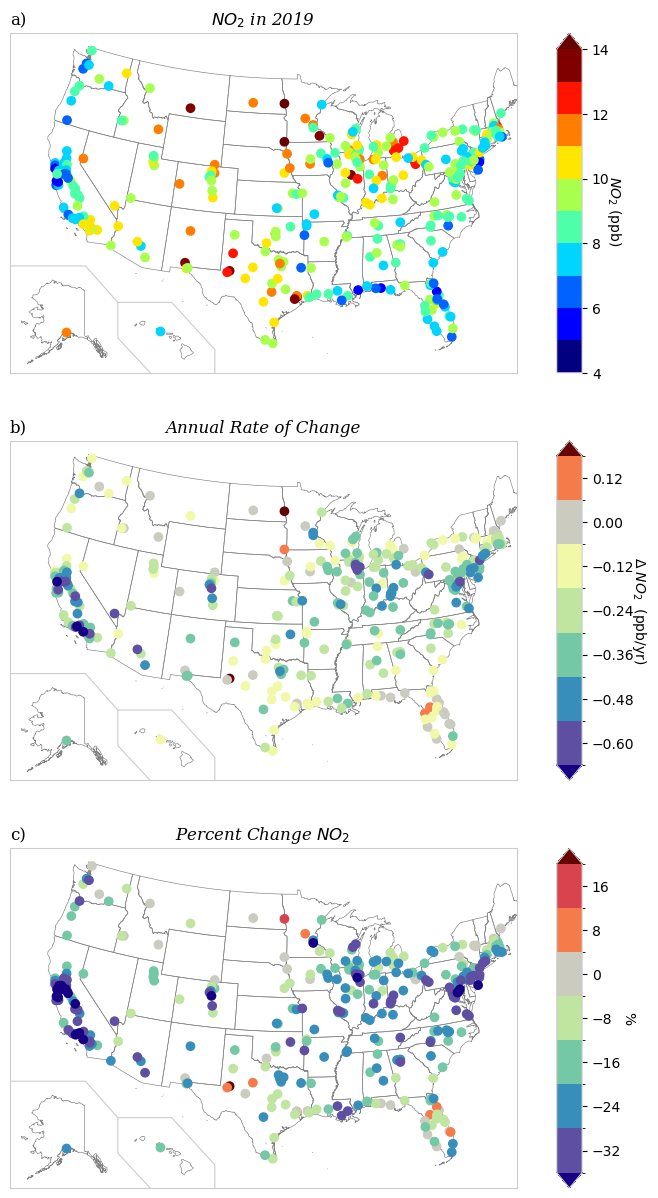

In [17]:
fig = plt.figure(figsize=(10,15))
norm = mpl.colors.BoundaryNorm(boundaries=b3, ncolors=cm.N )
ax,cbar = plot_map(df,313,norm,cm, 'ConcPercChange',t3,'both')
cbar.set_label('%', rotation=270,labelpad=10)
ax.set_title(r'Percent Change $NO_{2}$ ',fontfamily='serif', fontstyle='italic')
ax.set_title('c)',loc='left',fontfamily='serif' )

norm = mpl.colors.BoundaryNorm(boundaries=b2, ncolors=cm2.N )
ax,cbar = plot_map(df,312,norm,cm2, 'Slope',t2,'both')
ax.set_title('Annual Rate of Change',fontfamily='serif', fontstyle='italic')
ax.set_title('b)',loc='left',fontfamily='serif' )
cbar.set_label(r'Δ $NO_{2}$  (ppb/yr)', rotation=270,labelpad=10)

cmap2=mpl.cm.get_cmap('jet',10)
cmap2.set_extremes(under='#160084', over='#650303')
norm = mpl.colors.Normalize(vmin=4, vmax=14)
ax,cbar = plot_map(df,311,norm,cmap2, 'NO2',t1,'max')
ax.set_title(r'$NO_{2}$ in 2019',fontfamily='serif', fontstyle='italic')
ax.set_title('a)',loc='left',fontfamily='serif' )
cbar.set_label(r'$NO_{2}$ (ppb)', rotation=270,labelpad=10)
plt.savefig(output_dir+'Concentration_Subplots.eps')

In [72]:
plt.close()

In [19]:
palette= sns.color_palette("crest")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Rate of Change
% Change Concentration
Regression Residual
Performance Score


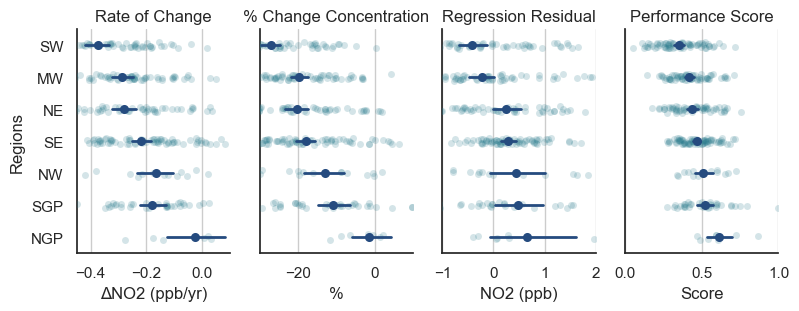

In [20]:
sns.set(font_scale=2)
#hue_order = ['0.10','0.25','0.50','0.75','0.90','1.00','NA']
splot = df[df.Region != 'Other'].sort_values(by='Total_Score',ascending=True)
sns.set_theme(style='white')
#splot['City']=splot.CityCountry.str.split(',',expand=True)[0]
g = sns.PairGrid(splot, #hue_order=hue_order,
                 x_vars=['Slope','ConcPercChange','Residuals','Total_Score'], y_vars=["Region"],height = 3, aspect = 2/3)

# Draw a dot plot using the stripplot function

g.map(sns.stripplot, orient="h",dodge=True, alpha=0.2,legend=False,color = palette[3],order = ['SW','MW','NE','SE','NW','SGP','NGP'],)

g.map(sns.pointplot, orient="h",dodge=True, linestyle='none',order = ['SW','MW','NE','SE','NW','SGP','NGP'], 
      linewidth=2,color = palette[5], zorder = 50)
# Use the same x axis limits on all columns and add better labels
g.set(ylabel= 'Regions')
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")
##new_labels = ['Q1','Q2','Q3','Q4']

#g.legend(labels = ['Q1','Q2','Q3','Q4'])
#g.tight_layout()
titles = ["Rate of Change","% Change Concentration","Regression Residual",'Performance Score']
         # "County GDP","Population Change"]
xlabels = {'ΔNO2 (ppb/yr)':(-0.45,0.1),'%':(-30,10),'NO2 (ppb)':(-1,2),'Score':(0,1)}
# Use semantically meaningful titles for the columns
for ax, title, xlabel in zip(g.axes.flat, titles ,xlabels):
    print(title)
    # Set a different title for each axes
    ax.set(title=title, xlabel=xlabel,xlim=xlabels[xlabel])

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(False)


#sns.despine(left=True, bottom=True)
plt.savefig(output_dir+'RangeMed by Region.eps')

In [88]:
df.sort_values(by='Total_Score',ascending=False).head(95)

,Unnamed: 0,Memberships,continent,Year,City,Country,Latitude,Longitude,Population,NO2,...,location_name_y,asthma_2019,ActualAF,PredictedAF,BaseAF,Actual_Cases,Predicted_Cases,Base_Cases,Cases_Residual,Rates_Residual
0,0,0,North America,2019,Midland,United States,32.0061,-102.1160,115016,13.62,...,TX,2862.518949,0.270046,0.193427,0.211286,228.177870,163.437864,161.040709,64.740006,219.323822
1,1,0,North America,2019,Fargo,United States,46.8571,-96.8225,201843,16.23,...,ND,2467.980579,0.312776,0.257927,0.279433,342.217054,282.205612,254.520329,60.011443,135.365174
2,2,0,North America,2019,Atascocita,United States,29.9943,-95.1759,67052,13.78,...,TX,2862.518949,0.272741,0.205662,0.262415,137.267055,103.507158,116.328060,33.759897,192.013976
3,3,0,North America,2019,Lowell,United States,42.6392,-71.3191,122068,12.56,...,MA,2938.042183,0.251943,0.187992,0.258827,182.249479,135.988567,182.275129,46.260912,187.892094
4,4,0,North America,2019,Odessa,United States,31.8687,-102.3610,108616,12.41,...,TX,2862.518949,0.249345,0.206530,0.229839,211.207513,174.940531,181.864134,36.266982,122.560855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,0,North America,2019,Indio,United States,33.7541,-116.3710,426757,10.48,...,CA,2670.777577,0.215105,0.188017,0.251251,655.627578,573.064255,585.057697,82.563323,72.346544
91,91,1,North America,2019,Waukegan,United States,42.3765,-87.9489,379533,9.77,...,IL,2618.325398,0.202119,0.180489,0.227165,520.238543,464.563271,561.214528,55.675272,56.635815
92,92,0,North America,2019,Provo,United States,40.3192,-111.7250,398955,9.95,...,UT,2032.084655,0.205432,0.191209,0.238160,562.231671,523.307236,510.893185,38.924434,28.901207
93,93,0,North America,2019,Savannah,United States,32.0559,-81.1198,159641,7.54,...,GA,2796.679495,0.159920,0.155242,0.178543,154.791558,150.263341,164.343221,4.528217,13.083550


In [50]:
df.query('Slope <0')

,Unnamed: 0,Memberships,continent,Year,City,Country,Latitude,Longitude,Population,NO2,...,location_name_y,asthma_2019,ActualAF,PredictedAF,BaseAF,Actual_Cases,Predicted_Cases,Base_Cases,Cases_Residual,Rates_Residual
7,7,1,North America,2019,Las Cruces,United States,32.3116,-106.7720,87180,13.03,...,NM,2749.987206,0.260025,0.208706,0.259340,159.716874,128.195272,150.436883,31.521602,141.124651
9,9,0,North America,2019,Kingwood,United States,30.0651,-95.2100,80624,11.83,...,TX,2862.518949,0.239216,0.191215,0.238160,143.826771,114.966635,119.596063,28.860136,137.403045
12,12,3,North America,2019,Houston,United States,29.7832,-95.4097,5543890,13.96,...,TX,2862.518949,0.275760,0.220223,0.285898,11512.234083,9193.708031,10122.467968,2318.526052,158.975959
13,13,0,North America,2019,Abilene,United States,32.4416,-99.7493,94537,10.81,...,TX,2862.518949,0.221068,0.192606,0.203593,141.085408,122.921141,132.517899,18.164268,81.472383
15,15,1,North America,2019,Boise,United States,43.6185,-116.3040,421078,9.90,...,ID,1984.655776,0.204513,0.169608,0.205064,420.483359,348.717747,343.081597,71.765612,69.274501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325,0,North America,2019,Tracy,United States,37.7309,-121.4310,102746,6.65,...,CA,2670.777577,0.142462,0.187154,0.233922,108.007763,141.891569,154.885740,-33.883806,-119.363814
326,326,0,North America,2019,Simi Valley,United States,34.2723,-118.7400,128722,7.78,...,CA,2670.777577,0.164567,0.202989,0.268188,137.376806,169.450573,216.958521,-32.073767,-102.616351
327,327,1,North America,2019,Watsonville,United States,36.9196,-121.7650,61268,5.49,...,CA,2670.777577,0.119161,0.173537,0.204329,41.990213,61.151537,73.797616,-19.161324,-145.227555
328,328,1,North America,2019,San Jose,United States,37.5691,-122.1450,4834100,8.40,...,CA,2670.777577,0.176452,0.208418,0.288863,4605.747562,5440.105683,7591.133694,-834.358121,-85.372400


In [74]:
df.query('Rates_Residual <0')['Rates_Residual'].mean()

-38.82267493299285

In [58]:
df.Rates.std()

12.172874686109912